### We will ster with a simple Example 


# Advective equation 

### $\frac{\partial u(x,t)}{\partial t}+c\frac{\partial u(x,t)}{\partial x}=\nu\frac{\partial^2 u(x,t)}{\partial x^2}+f(x,t)$
$c= 1 and \nu =0$

Given initial condition as $u(x,0)=\sin(x)$

In [1]:
from IPython.display import display,Math,Latex
import numpy as np

import matplotlib.pyplot as plt
import scipy.fftpack as sci

In [4]:
N=1024
L=2*np.pi
x=np.linspace(0,L,N)
UX=np.sin(x)
UX1=np.sin(x)
dt=0.00010
# plt.plot(UX)

In [64]:
UX

array([ 0.00000000e+00,  6.14188251e-03,  1.22835333e-02, ...,
       -1.22835333e-02, -6.14188251e-03, -2.44929360e-16])

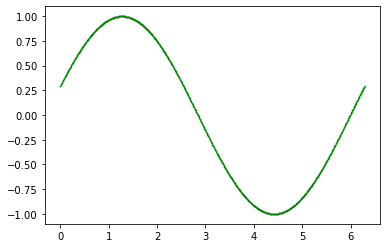

In [65]:
duk=np.ones(N,dtype=complex)
force_u_n=np.ones(N)
for i in range(1,6000):
#     Uk=sci.fft(UX)
    Uk=sci.fft(UX)
    c=complex(0,1)
    Uk=sci.fft(UX)
    for o in range(0,N):
        k=2.00*(np.pi)*float(o)/L
        duk[o]=c*k*Uk[o]
    dux=(sci.ifft(duk)).real
    for o in range(0,N):
        dux[o]=dux[o]/float(N)
        force_u_n[o]=-dux[o]
        if(i==1):
            UX[o]=UX[o]+dt*force_u_n[o]
        else:
            UX[o]=UX[o]+dt*((3.0/2.0)*force_u_n[o]-(1.0/2.0)*force_u_o[o])
    force_u_o=force_u_n


plt.scatter(x,UX,label= "stars", color= "green",
            marker= ".", s=1)
    

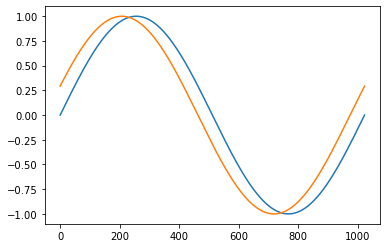

In [66]:
plt.plot(UX1)
plt.plot(UX)


It can be seen that curve is just advancing in x direction and there is no change in shape

In [62]:
dux

array([ 87788.86161866,  79992.71325444,  72193.71636256, ...,
       111157.23958386, 103371.42214122,  95581.86374055])

In [56]:



dux

array([-0.47167513, -0.47189833, -0.47147463, ..., -0.47522938,
       -0.47393655, -0.47227468])

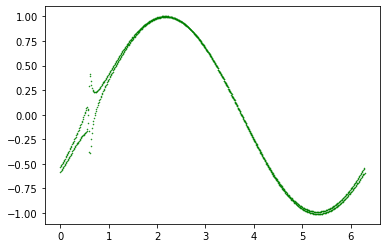

In [5]:
# proposed correction subjected to verification
duk=np.ones(N,dtype=complex)
force_u_n=np.ones(N)
for i in range(1,6000):
#     Uk=sci.fft(UX)
    Uk=sci.fft(UX)
    c=complex(0,1)
    Uk=sci.fft(UX)
    for o in range(0,N):
        if o < N/2:
            k=2.00*(np.pi)*float(o)/L
        else:
            k=2.00*(np.pi)*float(o-N)/L
        duk[o]=c*k*Uk[o]
    dux=(sci.ifft(duk)).real
    for o in range(0,N):
#         dux[o]=dux[o]/float(N)
        force_u_n[o]=-dux[o]
        if(i==1):
            UX[o]=UX[o]+dt*force_u_n[o]
        else:
            UX[o]=UX[o]+dt*((3.0/2.0)*force_u_n[o]-(1.0/2.0)*force_u_o[o])
    force_u_o=force_u_n


plt.scatter(x,UX,label= "stars", color= "green",
            marker= ".", s=1)

In [4]:
len(dux)

1024

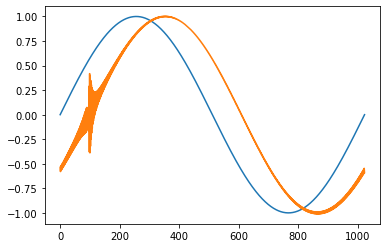

In [6]:
plt.plot(UX1)
plt.plot(UX)

In [7]:
a=[1,2,3,4,5]
b=[1,2,3,4,5,6]
a1=sci.fft(a)
b1=sci.fft(b)
a1

array([15. -0.j        , -2.5+3.4409548j , -2.5+0.81229924j,
       -2.5-0.81229924j, -2.5-3.4409548j ])

In [9]:
b1

array([21.-0.j        , -3.+5.19615242j, -3.+1.73205081j, -3.-0.j        ,
       -3.-1.73205081j, -3.-5.19615242j])